# PETE 2061 Mid-term Exam (Part 2) 

## THIS IS DUE BY 12:20 PM TODAY

## Instructions
* You will be video-monitored, and any violation of the LSU Code of Student Conduct will be reported to the Office of Student Advocacy and Accountability (SAA).
* This is an open book exam. You may use cheat sheets, lecture notes and lab notebooks in soft or hard copies. 
* You are not allowed to use the internet or your cell phones. 
* You can download all lecture materials before the exam starts, but not during the exam.
* You are not allowed to start with this section of the finals until the first part is completed.
* Make sure you save often, and be sure you know where the file you are working on is being saved.

1. Well-1 is the only well in a gas reservoir, referred to as "Reservoir A". The production rate from Well-1 is assumed to decline following either the exponential or the harmonic decline model. The initial gas rate ($q_i$) from this well is 900000 scf, and its initial decline rate ($D_i$) is 0.15% per day (which is equivalent to 0.0015 per day). Write a Python code that: <br>
    a. **[5 points]** Reads in either "Exp" or "Harm" using the input function, and stores the string typed in by the user into a variable named "model". <br>
    b. **[10 points]** If the model typed in by the user is "Exp", use the appropriate expoonential decline equation to compute the cumulative production for the first 3650 days (10 years) of production. <br>
    c. **[5 points]** If the model typed in by the user is "Harm", use the  appropriate harmonic decline equation to predict the cumulative production for the first 3650 days (10 years) of production. <br>
    d. **[5 points]** Plot the cumulative production versus time, based on the decline model selected. <br>
    e. **[5 points]** Compute and display the mean, minimum, maximum and standard deviation of the cumulative production obtained.

Enter 'Exp' for exponential decline, or 'Harm' for harmonic decline:Exp


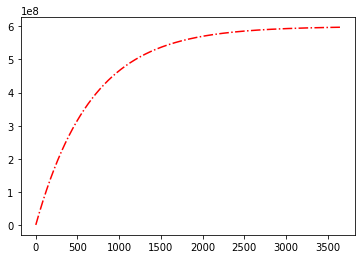

Average: 490817518.39652115 scf Minimum: 0.0 scf Maximum: 597485862.8700092 scf Standard Deviation: 144898734.20356858 scf


In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

q_i = 900000 #initial gas rate in standard cubic feet
d_i = 0.0015 #daily decline rate
timeVec = np.arange(0,3651) #time vector array day 0-3650

model = str(input("Enter 'Exp' for exponential decline, or 'Harm' for harmonic decline:"))

if model=="Exp" or model=="exp":
    expDecline = q_i*np.exp(-d_i*timeVec)
    expProd = (q_i-expDecline)/d_i
    plt.plot(timeVec,expProd,'r-.')
    plt.show()
    print(f"Average: {np.average(expProd)} scf Minimum: {np.min(expProd)} scf Maximum: {np.max(expProd)} scf Standard Deviation: {np.std(expProd)} scf")
    
elif model=="Harm" or model=="harm":
    harmDecline = q_i/(1+(d_i*timeVec))
    harmProd = (q_i/d_i)*np.log(1+(d_i*timeVec))
    plt.plot(timeVec,harmProd,'g--')
    plt.show()
    print(f"Average: {np.average(harmProd)} scf Minimum: {np.min(harmProd)} scf Maximum: {np.max(harmProd)} scf Standard Deviation: {np.std(harmProd)} scf")

else:
    print("Invalid command.")
    

    

2. # Volumetric Reserves Estimation
The Gas Initially In Place (GIIP) is the amount of gas (in scf) that is initially stored in a gas reservoir. Assuming that the pore spaces in the reservoir are filled with water and gas only, the GIIP can be estimated using the formula:<br><br>
$GIIP = 43560 \, Ah\phi(1-S_{wi})\,/\,B_{gi}$ <br><br>
where $A$ is the area of the reservoir in acres, <br>
$h$ is the reservoir thickness in feet (ft), <br>
$S_{wi}$ is the initial water saturation of the reservoir. It is the ratio of the volume of water initially in the reservoir to the total pore volume in the reservoir. It can either be expressed as a fraction or percentage. <br>
$B_{gi}$ is the initial gas formation volume factor. It is the ratio of the volume of gas at reservoir conditions (measured in units of reservoir cubic feet, rcf) to the volume of gas at standard conditions (measured in units of standard cubic feet, scf). This means that the unit of $B_{gi}$ is $\frac{rcf}{scf}$ <br>
$\phi$ is the porosity of the reservoir. It is the ratio of the pore volume to the bulk volume, and can be expressed as a fraction or in percentage. <br>
43560 is the conversion factor from acre-ft to reservoir cubic feet (rcf) <br><br>

(a) **[10 points]** Given the values below for "Reservoir A", write a Python code that calculates and prints the GIIP value and its unit (scf). <br>
A = 80  $\hspace{22pt}$ # in acres <br>
h = 30 $\hspace{27pt}$ # in feet <br>
$\phi$ = 0.25 $\hspace{19pt}$ # fraction<br>
$S_{wi}$ = 0.35 $\hspace{15pt}$ # fraction<br>
$B_{gi}$ = 0.0035 $\hspace{19pt}$ # rb/stb <br>

In [2]:
A = 80
h = 30
poro = 0.25
s_wi = 0.35
b_gi = 0.0035

GIIP = (43560*A*h*poro*(1-s_wi))/b_gi
print(f"The gas initially in place in Reservoir A is: {GIIP} standard cubic feet.")


The gas initially in place in Reservoir A is: 4853828571.428572 standard cubic feet.


Recovery factor (RF) is the ratio of cumulative gas production ($G_p$) to the Gas Initially In Place ($GIIP$). That is, $RF = G_p \, / \, GIIP$. <br>
(b) **[10 points]** Write a Python code that will compute and print out the recovery factor for reservoir A. To solve this problem:
* Use your result for the maximum cumulative gas production from 1(e) as G_p.<br>
* Use the GIIP value obtained from problem 2(a).

In [3]:
G_p = np.max(harmProd)
RF = G_p/GIIP
print(f"The recovery factor of Reservoir A is {RF}.")

The recovery factor of Reservoir A is 0.23090415082819823.
